In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_csv(name):
    return pd.read_csv(name,
                       encoding = 'utf-16',
                       dtype = {'Stkcd':str},
                       sep = '\t')

rate_df = read_csv('TRD_Mnth.csv')
asset_df = read_csv('FS_Combas.csv')

In [3]:
'''
Stkcd [证券代码] - 以上交所、深交所公布的证券代码为准
Trdmnt [交易月份] - 以YYYY-MM表示
Mclsprc [月收盘价] - 
Msmvttl [月个股总市值] - 个股的发行总股数与收盘价的乘积，A股以人民币元计，上海B股以美元计，深圳B股以港币计
Mretwd [考虑现金红利再投资的月个股回报率] - 字段说明见“回报率计算方法”
Markettype [市场类型] - 1=上海A，2=上海B，4=深圳A，8=深圳B,  16=创业板
'''
rate_df

,Stkcd,Trdmnt,Mclsprc,Msmvttl,Mretwd,Markettype
0,000001,2010-01,21.700,67387912.64,-0.109561,4
1,000001,2010-02,22.450,69716987.96,0.034562,4
2,000001,2010-03,23.200,72046063.28,0.033408,4
3,000001,2010-04,20.560,63847718.15,-0.113793,4
4,000001,2010-05,17.510,54376145.17,-0.148346,4
5,000001,2010-06,17.510,61022590.97,0.000000,4
6,000001,2010-09,16.220,56526923.22,-0.073672,4
7,000001,2010-10,18.410,64159103.36,0.135018,4
8,000001,2010-11,16.390,57119375.56,-0.109723,4
9,000001,2010-12,15.790,55028367.30,-0.036608,4


In [4]:
'''
Stkcd [证券代码] - 指上市公司所在的交易所公布的代码。
Accper [会计期间] - 指会计报表日，统一用10位字符表示，如1999-12-31。
Typrep [报表类型] - 指上市公司的财务报表中反映的是合并报表或者母公司报表。“A＝合并报表”、“B＝母公司报表”。
A002000000 [负债合计] - 负债各项目之合计。1990年起使用
A003000000 [所有者权益合计] - 股东权益各项目之合计。1990年起使用
A004000000 [负债与所有者权益总计] - 负债与股东权益各项目之总计。1990年起使用
'''
asset_df

,Stkcd,Accper,Typrep,A002000000,A003000000,A004000000
0,000001,2010-03-31,A,5.978178e+11,2.210983e+10,6.199276e+11
1,000001,2010-06-30,A,5.939771e+11,3.042111e+10,6.243982e+11
2,000001,2010-09-30,A,6.429197e+11,3.214414e+10,6.750639e+11
3,000001,2010-12-31,A,6.940972e+11,3.351288e+10,7.276101e+11
4,000001,2010-01-01,A,5.673414e+11,2.046961e+10,5.878110e+11
5,000001,2011-03-31,A,7.716134e+11,3.595007e+10,8.075634e+11
6,000001,2011-06-30,A,8.139046e+11,3.815240e+10,8.520570e+11
7,000001,2011-09-30,A,1.135526e+12,7.168626e+10,1.207212e+12
8,000001,2011-09-30,B,8.610266e+11,6.943245e+10,9.304591e+11
9,000001,2011-12-31,A,1.182796e+12,7.538058e+10,1.258177e+12


根据2014年情况划分B/M比例（总资产/股市总市值）高低股票与总市值本身高低股票。并在选择的池中用总市值加权出指数，计算其月收益率。

In [5]:
rate_df_dict = {Stkcd:df for Stkcd,df in list(rate_df.groupby('Stkcd'))}

In [6]:
rate_df_dict['000001']

,Stkcd,Trdmnt,Mclsprc,Msmvttl,Mretwd,Markettype
0,000001,2010-01,21.70,6.738791e+07,-0.109561,4
1,000001,2010-02,22.45,6.971699e+07,0.034562,4
2,000001,2010-03,23.20,7.204606e+07,0.033408,4
3,000001,2010-04,20.56,6.384772e+07,-0.113793,4
4,000001,2010-05,17.51,5.437615e+07,-0.148346,4
5,000001,2010-06,17.51,6.102259e+07,0.000000,4
6,000001,2010-09,16.22,5.652692e+07,-0.073672,4
7,000001,2010-10,18.41,6.415910e+07,0.135018,4
8,000001,2010-11,16.39,5.711938e+07,-0.109723,4
9,000001,2010-12,15.79,5.502837e+07,-0.036608,4


In [7]:
from collections import Counter
#有收益率记录的数量
Counter([len(df) for df in rate_df_dict.values()])

Counter({1: 14,
         2: 16,
         3: 13,
         4: 11,
         5: 17,
         6: 6,
         7: 2,
         8: 28,
         9: 4,
         10: 4,
         11: 3,
         12: 3,
         13: 15,
         14: 47,
         15: 45,
         16: 29,
         17: 27,
         18: 14,
         19: 20,
         20: 14,
         21: 12,
         22: 16,
         23: 10,
         24: 8,
         25: 9,
         26: 8,
         28: 7,
         29: 5,
         30: 7,
         31: 22,
         32: 1,
         33: 2,
         34: 1,
         35: 3,
         36: 2,
         37: 4,
         38: 3,
         39: 3,
         40: 3,
         41: 1,
         42: 6,
         43: 10,
         44: 12,
         45: 12,
         46: 14,
         47: 17,
         48: 24,
         49: 13,
         50: 17,
         51: 24,
         52: 10,
         53: 26,
         54: 13,
         55: 17,
         56: 19,
         57: 26,
         58: 20,
         59: 34,
         60: 35,
         61: 21,
         62:

In [8]:
#只取有70个以上的观测的股票进入

obs_limit = 70

share_pool = [key for key in rate_df_dict.keys() if len(rate_df_dict[key])>=obs_limit]

print("share pool size : {}".format(len(share_pool)))
print("origin pool size : {}".format(len(rate_df_dict)))

share pool size : 1847
origin pool size : 3012


In [18]:
book_df = asset_df[(asset_df['Accper']=='2010-01-01') & (asset_df['Typrep']=='A')]
book_df.index = book_df['Stkcd']

book_df



,Stkcd,Accper,Typrep,A002000000,A003000000,A004000000
Stkcd,,,,,,
000001,000001,2010-01-01,A,5.673414e+11,2.046961e+10,5.878110e+11
000002,000002,2010-01-01,A,9.220004e+10,4.540851e+10,1.376086e+11
000004,000004,2010-01-01,A,1.406971e+08,8.981498e+07,2.305121e+08
000005,000005,2010-01-01,A,6.168267e+08,7.023772e+08,1.319204e+09
000006,000006,2010-01-01,A,5.080070e+09,2.191958e+09,7.272028e+09
000007,000007,2010-01-01,A,4.177256e+08,-5.445400e+07,3.632716e+08
000008,000008,2010-01-01,A,6.081754e+06,7.332622e+07,7.940798e+07
000009,000009,2010-01-01,A,4.516901e+09,2.985109e+09,7.502010e+09
000010,000010,2010-01-01,A,1.480753e+08,8.377988e+07,2.318552e+08


In [17]:
market_df = rate_df[rate_df['Trdmnt']=='2010-01']
market_df.index = market_df['Stkcd']

market_df

,Stkcd,Trdmnt,Mclsprc,Msmvttl,Mretwd,Markettype
Stkcd,,,,,,
000001,000001,2010-01,21.700,67387912.64,-0.109561,4
000002,000002,2010-01,9.340,90413579.37,-0.135985,4
000005,000005,2010-01,5.390,4928258.14,-0.104651,4
000006,000006,2010-01,9.960,5051545.29,-0.120918,4
000007,000007,2010-01,6.910,1278110.66,-0.017070,4
000008,000008,2010-01,9.630,709280.39,-0.215798,4
000009,000009,2010-01,10.430,11376528.02,-0.050091,4
000010,000010,2010-01,11.420,1678939.26,-0.037099,4
000011,000011,2010-01,9.730,5141077.55,-0.089804,4


In [24]:
BM = book_df['A003000000']/market_df['Msmvttl']
BM.ix[1000:1100]

Stkcd
002530            NaN
002531            NaN
002532            NaN
002533            NaN
002534            NaN
002535            NaN
002536            NaN
002537            NaN
002538            NaN
002539            NaN
002540            NaN
002541            NaN
002542            NaN
002543            NaN
002544            NaN
002545            NaN
002546            NaN
002548            NaN
002549            NaN
002550            NaN
002551            NaN
002552            NaN
002553            NaN
002554            NaN
002556            NaN
002558            NaN
002564            NaN
200002    4376.724666
200011    1963.255746
200012    1499.826793
             ...     
200613     264.495964
200625    2398.868899
200706     566.412394
200725    8857.648271
200726    1979.362871
200761    9517.953202
200770    -661.001773
200771     437.358974
200869     263.119741
200986    1339.784568
200992     430.939353
300001     204.228855
300002     158.821871
300003     100.302071
3000

秘制计算结果，而且没有考虑汇率，当然考虑了汇率也不会靠谱多少。再上国泰安数据库发现账面价值比甚至市值都直接给你了。

In [47]:
_index_df = read_csv('FI_T10.csv')

'''
Stkcd [股票代码] - 以上海交易所、深圳证券交易所公布的证券代码为准
Accper [截止日期] - 指会计报表日，统一用10位字符表示，如1999-12-31。
Indcd [行业代码] - 证监会行业分类2012年版
F100101B [市盈率1] - 今收盘价当期值/（净利润上年年报值/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；
F100102B [市盈率2] - 今收盘价当期值/（调整因子*净利润当期值/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；调整因子：调整因子和（利润表科目）会计期间相关（即是：开始日期、截止日期的月份差额）；即是：12/(间隔月份)。比如，一季度为：12/3；前6个月：12/6,；1到9月份：12/9，全年：1；下同
F100103C [市盈率TTM] - 今收盘价当期值/（净利润TTM/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；
F100201B [市销率1] - 今收盘价当期值/（营业总收入上年年报值/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；
F100202B [市销率2] - 今收盘价当期值/（调整因子*营业总收入当期值/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；
F100203C [市销率TTM] - 今收盘价当期值/（营业总收入TTM/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；
F100301B [市现率1] - 今收盘价当期值/（经营活动产生的现金流量净额上年年报值/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；
F100302B [市现率2] - 今收盘价当期值/（调整因子*经营活动产生的现金流量净额当期值/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；
F100303C [市现率TTM] - 今收盘价当期值/（经营活动产生的现金流量净额TTM/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；
F100401A [市净率] - 今收盘价当期值/（所有者权益合计期末值/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；
F100501A [市值有形资产比] - 今收盘价当期值/[（资产总计—无形资产净额—商誉净额）期末值/实收资本本期期末值]；当分母未公布或为零或小于零时，以NULL表示；
F100601B [市盈率母公司1] - 今收盘价当期值/（归属于母公司所有者的净利润上年年报值/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；
F100602B [市盈率母公司2] - 今收盘价当期值/（调整因子*归属于母公司所有者的净利润当期值/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；
F100603C [市盈率母公司TTM] - 今收盘价当期值/[（归属于母公司所有者的净利润）TTM/实收资本本期期末值]；当分母未公布或为零或小于零时，以NULL表示；
F100701A [市净率母公司] - 今收盘价当期值/（归属于母公司所有者权益合计期末值/实收资本本期期末值）；当分母未公布或为零或小于零时，以NULL表示；
F100801A [市值A] - (总股本—境内上市的外资股B股）*今收盘价A股当期值+境内上市的外资股B股*B股今收盘价当期值*当日汇率；
当分母未公布或为零或小于零时，以NULL 表示；
F100802A [市值B] - （总股数—境内上市的外资股B股）*今收盘价A股当期值+境内上市的外资股B股*今收盘价当期值*当日汇率+负债合计本期期末值；当分母未公布或为零或小于零时，以NULL表示；
F100901A [托宾Q值A] - 市值A/资产总计；当分母未公布或为零或小于零时，以NULL表示；
F100902A [托宾Q值B] - 市值A/（资产总计—无形资产净额—商誉净额）；当分母未公布或为零或小于零时，以NULL表示；
F100903A [托宾Q值C] - 市值B/资产总计；当分母未公布或为零或小于零时，以NULL表示；
F100904A [托宾Q值D] - 市值B/（资产总计—无形资产净额—商誉净额）；当分母未公布或为零或小于零时，以NULL表示；
F101001A [账面市值比A] - 资产总计/市值A；当分母未公布或为零或小于零时，以NULL表示；
F101002A [账面市值比B] - 资产总计/市值B；当分母未公布或为零或小于零时，以NULL表示；
F101101B [本利比] - 今收盘价本期期末值/每股派息税后；当分母未公布或为零或小于零时，以NULL表示；
F101201B [普通股获利率A] - 每股派息税后/今收盘价本期值；当分母未公布或为零或小于零时，以NULL表示；
F101202B [普通股获利率B] - 每股派息税后/今收盘价本期值+（今收盘价当期值—今收盘价当期期初值）/今收盘价当期期初值；当分母未公布或为零或小于零时，以NULL表示；
F101301B [企业价值倍数] - 总市值/息税折旧摊销前收入；当分母未公布或为零或小于零时，以NULL表示；
F101302C [企业价值倍数TTM] - 总市值/息税折旧摊销前收入TTM；当分母未公布或为零或小于零时，以NULL表示；
'''

_index_df

,Stkcd,Accper,Indcd,F100101B,F100102B,F100103C,F100201B,F100202B,F100203C,F100301B,...,F100902A,F100903A,F100904A,F101001A,F101002A,F101101B,F101201B,F101202B,F101301B,F101302C
0,000001,2009-12-31,J66,15.043431,15.043431,15.043431,5.294540,5.294540,5.294540,2.350759,...,0.128782,1.093924,1.094216,7.767119,0.914140,NaN,0.000000,1.576110,NaN,NaN
1,000001,2010-03-31,J66,14.321199,11.413289,13.130871,5.040350,4.552168,4.892204,2.237900,...,0.116244,1.080552,1.080808,8.604601,0.925453,NaN,0.000000,-0.048010,NaN,NaN
2,000001,2010-06-30,J66,12.129971,10.059380,10.608087,4.269146,3.706183,3.905616,1.895488,...,0.097755,1.049010,1.049279,10.232246,0.953280,NaN,0.000000,-0.281494,NaN,NaN
3,000001,2010-09-30,J66,11.236329,8.955584,9.225497,3.954629,3.334413,3.410581,1.755843,...,0.083756,1.036119,1.036372,11.942343,0.965140,NaN,0.000000,-0.334428,NaN,NaN
4,000001,2010-12-31,J66,8.757158,8.757158,8.757158,3.133407,3.133407,3.133407,2.530471,...,0.075649,1.029570,1.029841,13.222454,0.971279,NaN,0.000000,-0.352072,NaN,NaN
5,000001,2011-03-31,J66,8.917993,5.832055,7.884051,3.190956,2.493898,2.915244,2.576946,...,0.069409,1.024876,1.025116,14.410734,0.975728,NaN,0.000000,0.018366,NaN,NaN
6,000001,2011-06-30,J66,9.467048,6.286177,7.452504,3.387414,2.554429,2.836382,2.735601,...,0.069834,1.025042,1.025265,14.322890,0.975570,NaN,0.000000,0.081064,NaN,NaN
7,000001,2011-09-30,J66,13.077807,7.957816,8.841200,4.679383,3.050454,3.280290,3.778967,...,0.068848,1.008691,1.020176,14.690118,0.991384,NaN,0.000000,0.015833,NaN,NaN
8,000001,2011-12-31,J66,7.687127,7.687127,7.687127,2.745974,2.745974,2.745974,-5.531613,...,0.064175,1.003571,1.014503,15.752212,0.996442,NaN,0.000000,-0.012666,NaN,NaN
9,000001,2012-03-31,J66,7.746297,5.756555,7.008828,2.767110,2.132826,2.446132,-5.574191,...,0.059420,1.001119,1.011062,16.996420,0.998883,NaN,0.000000,0.007697,NaN,NaN


(array([  1.03080000e+04,   1.78630000e+04,   1.18870000e+04,
          6.86300000e+03,   4.14800000e+03,   2.74100000e+03,
          1.98300000e+03,   1.42300000e+03,   1.09000000e+03,
          8.92000000e+02,   6.88000000e+02,   5.26000000e+02,
          4.45000000e+02,   3.35000000e+02,   3.00000000e+02,
          2.18000000e+02,   2.03000000e+02,   1.53000000e+02,
          1.41000000e+02,   1.22000000e+02,   1.11000000e+02,
          9.30000000e+01,   7.90000000e+01,   6.00000000e+01,
          5.30000000e+01,   5.50000000e+01,   4.10000000e+01,
          4.00000000e+01,   3.70000000e+01,   3.60000000e+01,
          2.50000000e+01,   2.00000000e+01,   1.80000000e+01,
          2.20000000e+01,   1.60000000e+01,   2.00000000e+01,
          1.90000000e+01,   1.70000000e+01,   1.50000000e+01,
          7.00000000e+00,   8.00000000e+00,   1.80000000e+01,
          1.00000000e+01,   1.20000000e+01,   1.10000000e+01,
          1.50000000e+01,   1.80000000e+01,   1.50000000e+01,
        

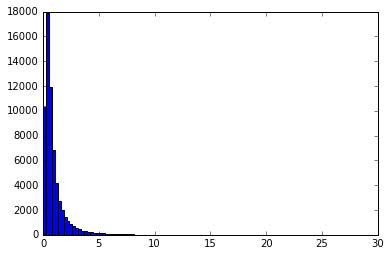

In [48]:
plt.hist(_index_df['F101001A'],bins=100)

In [49]:
share_pool_set = set(share_pool)

index_df = _index_df[(_index_df['Accper'] == '2009-12-31')&(_index_df['Stkcd'].map(lambda code:code in share_pool_set)) ]
index_df.index = index_df['Stkcd']

size = len(index_df)

In [50]:
index_df.sort_values(by = 'F101001A')

,Stkcd,Accper,Indcd,F100101B,F100102B,F100103C,F100201B,F100202B,F100203C,F100301B,...,F100902A,F100903A,F100904A,F101001A,F101002A,F101101B,F101201B,F101202B,F101301B,F101302C
Stkcd,,,,,,,,,,,,,,,,,,,,,
600083,600083,2009-12-31,C39,-184.822902,-184.822902,-184.822902,NaN,NaN,NaN,-264.674765,...,60.387512,51.348663,61.055572,0.019690,0.019475,NaN,0.000000,2.027682,-263.276673,-263.276673
000555,000555,2009-12-31,C39,-102.788895,-102.788895,-102.788895,166.521735,166.521735,166.521735,-20.990934,...,35.145371,41.885923,41.885923,0.028453,0.023874,NaN,0.000000,1.227160,-1319.343271,-1319.343271
000536,000536,2009-12-31,C38,398.714073,398.714073,398.714073,42.297981,42.297981,42.297981,-103.355700,...,33.270073,33.674212,33.674212,0.030057,0.029696,NaN,0.000000,NaN,108.014530,108.014530
000409,000409,2009-12-31,C35,-107.401406,-107.401406,-107.401406,97.519777,97.519777,97.519777,202.585600,...,28.503942,28.711187,28.711187,0.035083,0.034830,NaN,0.000000,2.010417,-100.957122,-100.957122
600421,600421,2009-12-31,C27,32.086343,32.086343,32.086343,92.859335,92.859335,92.859335,25.033957,...,25.525169,25.967540,28.955252,0.043685,0.038510,NaN,0.000000,2.444444,26.827016,26.827016
600617,600617,2009-12-31,C28,-16.917619,-16.917619,-16.917619,61.023540,61.023540,61.023540,2315.365251,...,19.794958,22.045838,22.047887,0.050523,0.045360,NaN,0.000000,0.807229,-14.813593,-14.813593
900913,900913,2009-12-31,C28,-8.440434,-8.440434,-8.440434,30.445487,30.445487,30.445487,1155.167707,...,19.794958,22.045838,22.047887,0.050523,0.045360,NaN,0.000000,1.089644,-14.813593,-14.813593
600988,600988,2009-12-31,C37,-88.455140,-88.455140,-88.455140,59.135771,59.135771,59.135771,-173.830047,...,18.041603,17.587446,19.883656,0.062664,0.056859,NaN,0.000000,2.434667,-103.191994,-103.191994
000613,000613,2009-12-31,H61,-691.350284,-691.350284,-691.350284,65.961505,65.961505,65.961505,-2712.790718,...,18.776612,14.440074,19.201784,0.070820,0.069252,NaN,0.000000,2.092391,417.716434,417.716434


In [72]:
low = index_df.sort_values(by = 'F101001A').ix[:size // 2]
high = index_df.sort_values(by = 'F101001A').ix[size // 2:]

#market_df['Mretwd'][low.index].mean()
#market_df['Mretwd'][high.index].mean()

records = []

for date,df in list(rate_df.groupby('Trdmnt')):
    df.index = df['Stkcd']
    rate_low = df['Mretwd'][low.index].mean()
    rate_high = df['Mretwd'][high.index].mean()
    records.append((date,rate_low,rate_high))

df_HML = pd.DataFrame(records)
df_HML.columns = ['Trdmnt','rate_low','rate_high']
df_HML['HML'] = df_HML['rate_high'] - df_HML['rate_low']

df_HML

,Trdmnt,rate_low,rate_high,HML
0,2010-01,-0.024057,-0.043039,-0.018982
1,2010-02,0.058898,0.065328,0.006431
2,2010-03,0.047806,0.034905,-0.012901
3,2010-04,-0.053555,-0.084749,-0.031194
4,2010-05,-0.067284,-0.103131,-0.035847
5,2010-06,-0.090619,-0.088768,0.001851
6,2010-07,0.145760,0.163417,0.017657
7,2010-08,0.108897,0.074136,-0.034761
8,2010-09,0.016312,0.015082,-0.001230
9,2010-10,0.085687,0.104658,0.018971


In [73]:
small = index_df.sort_values(by = 'F100801A').ix[:size // 2]
big = index_df.sort_values(by = 'F100801A').ix[size // 2:]

records = []

for date,df in list(rate_df.groupby('Trdmnt')):
    df.index = df['Stkcd']
    rate_small = df['Mretwd'][small.index].mean()
    rate_big = df['Mretwd'][big.index].mean()
    records.append((date,rate_small,rate_big))

df_SMB = pd.DataFrame(records)
df_SMB.columns = ['Trdmnt','rate_small','rate_big']
df_SMB['SMB'] = df_SMB['rate_small'] - df_SMB['rate_big']

df_SMB

,Trdmnt,rate_small,rate_big,SMB
0,2010-01,-0.021169,-0.045913,0.024744
1,2010-02,0.076555,0.047714,0.028841
2,2010-03,0.056736,0.026030,0.030705
3,2010-04,-0.070090,-0.068257,-0.001833
4,2010-05,-0.087055,-0.083507,-0.003548
5,2010-06,-0.089960,-0.089425,-0.000535
6,2010-07,0.157710,0.151495,0.006215
7,2010-08,0.112435,0.070633,0.041802
8,2010-09,0.013820,0.017574,-0.003754
9,2010-10,0.077841,0.112441,-0.034601


In [74]:
records = []

for date,df in list(rate_df.groupby('Trdmnt')):
    df.index = df['Stkcd']
    rate = df['Mretwd'][index_df.index].mean()
    records.append((date,rate))

global_df = pd.DataFrame(records)
global_df.columns = ['Trdmnt','rate']

global_df

,Trdmnt,rate
0,2010-01,-0.033572
1,2010-02,0.062117
2,2010-03,0.041335
3,2010-04,-0.069171
4,2010-05,-0.085274
5,2010-06,-0.089692
6,2010-07,0.154605
7,2010-08,0.091560
8,2010-09,0.015697
9,2010-10,0.095184


In [80]:
FAMA = pd.DataFrame()

FAMA['rate_market'] = global_df['rate']
FAMA['SMB'] = df_SMB['SMB']
FAMA['HML'] = df_HML['HML']
FAMA.index = df_HML['Trdmnt']

FAMA

,rate_market,SMB,HML
Trdmnt,,,
2010-01,-0.033572,0.024744,-0.018982
2010-02,0.062117,0.028841,0.006431
2010-03,0.041335,0.030705,-0.012901
2010-04,-0.069171,-0.001833,-0.031194
2010-05,-0.085274,-0.003548,-0.035847
2010-06,-0.089692,-0.000535,0.001851
2010-07,0.154605,0.006215,0.017657
2010-08,0.091560,0.041802,-0.034761
2010-09,0.015697,-0.003754,-0.001230


In [85]:
FAMA_data = FAMA.copy()

for Stkcd,df in rate_df_dict.items():
    df.index = df['Trdmnt']
    FAMA_data['s'+Stkcd] = df['Mretwd']
    
FAMA_data

,rate_market,SMB,HML,s000598,s000045,s600978,s600269,s300157,s600410,s002353,...,s600858,s200429,s300395,s600491,s000928,s002258,s300401,s002016,s600148,s600300
Trdmnt,,,,,,,,,,,,,,,,,,,,,
2010-01,-0.033572,0.024744,-0.018982,-0.028668,-0.007267,0.039897,-0.029919,NaN,0.065371,NaN,...,-0.055427,-0.039900,NaN,-0.218803,-0.067661,-0.044715,NaN,-0.212323,-0.171355,-0.070838
2010-02,0.062117,0.028841,0.006431,0.142361,-0.063690,-0.033416,-0.004745,NaN,0.011609,NaN,...,0.128362,0.031169,NaN,0.100656,0.067651,0.008936,NaN,0.239958,0.079218,-0.006353
2010-03,0.041335,0.030705,-0.012901,0.249240,0.066458,0.008963,-0.036949,NaN,-0.045355,0.093293,...,-0.078006,0.012594,NaN,0.088138,0.036866,-0.008857,NaN,-0.065644,0.128694,-0.052430
2010-04,-0.069171,-0.001833,-0.031194,0.082725,-0.113636,-0.072335,-0.147277,NaN,0.001145,-0.143494,...,0.064630,-0.057214,NaN,-0.294762,0.011111,-0.154894,NaN,-0.180657,-0.141047,-0.174089
2010-05,-0.085274,-0.003548,-0.035847,0.084270,-0.015715,-0.216292,-0.097242,NaN,-0.231561,0.016233,...,-0.006623,-0.079156,NaN,-0.154950,-0.183516,0.002040,NaN,-0.086860,0.030482,-0.129085
2010-06,-0.089692,-0.000535,0.001851,-0.041969,-0.094118,-0.133568,-0.069491,NaN,-0.030907,-0.034268,...,-0.056533,-0.025788,NaN,-0.196099,-0.173620,-0.195929,NaN,0.089024,-0.180344,0.072027
2010-07,0.154605,0.006215,0.017657,0.064359,0.179963,0.210953,0.103691,NaN,0.069172,0.142403,...,0.013381,0.120547,NaN,0.328225,0.312704,0.127848,NaN,0.003359,0.152503,0.139576
2010-08,0.091560,0.041802,-0.034761,-0.039634,0.069969,0.105528,-0.046178,NaN,0.003195,0.091263,...,0.094757,0.013550,NaN,0.068269,0.209677,0.048260,NaN,0.089286,0.087879,-0.024806
2010-09,0.015697,-0.003754,-0.001230,0.065079,0.049229,0.109091,-0.041736,NaN,0.207006,0.194187,...,0.040440,0.016043,NaN,-0.064806,-0.073846,0.007495,NaN,0.098361,0.006500,-0.042925


In [89]:
mod = smf.ols('s000001 ~ rate_market + SMB + HML',data=FAMA_data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                s000001   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     42.89
Date:                Wed, 24 Aug 2016   Prob (F-statistic):           4.31e-16
Time:                        20:14:28   Log-Likelihood:                 105.32
No. Observations:                  77   AIC:                            -202.6
Df Residuals:                      73   BIC:                            -193.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.0102      0.008      1.351      0.181        -0.005     0.025
rate_market     0.9332      0.095      9.830      0.000         0.744     1.122
SMB            -1.2670      0.384     -3.296      0.002        -2.033    -0.501
HML             0.8827      0.467      1.892      0.063        -0.047     1.813
==============================================================================
Omnibus:                       24.482   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.484
Skew:                           1.129   Prob(JB):                     4.89e-11
Kurtosis:                       6.115   Cond. No.                         79.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
res_dict = {}

#for Stkcd in rate_df_dict.keys():
for Stkcd in share_pool:
    try:
        formula = '{} ~ rate_market + SMB + HML'.format('s'+Stkcd)
        mod = smf.ols(formula,data=FAMA_data)
        res = mod.fit()
        res_dict[Stkcd] = res.params
    except ValueError:
        print("fit {} fail,skip".format(Stkcd))

In [103]:
final_df = pd.DataFrame(res_dict).T

final_df

,Intercept,rate_market,SMB,HML
000001,0.010177,0.933180,-1.266994,0.882708
000002,0.015101,0.735743,-1.022628,0.727031
000004,0.000043,0.957218,1.232393,0.039641
000006,0.002018,1.210701,0.556114,1.939348
000008,0.021516,1.218795,0.521823,-1.008479
000009,-0.001462,1.037187,0.888374,0.494170
000011,0.000994,1.086476,0.067626,0.941721
000012,-0.000029,1.235291,-1.069188,-0.520009
000014,-0.004425,1.126281,0.749171,1.551268
000016,-0.004291,1.192610,0.369432,1.086045


In [106]:
final_df.sort_values('Intercept')

,Intercept,rate_market,SMB,HML
000584,-0.052443,0.923266,8.105860,-0.055140
600701,-0.032456,0.817993,6.450575,1.538252
300080,-0.026961,0.873496,1.140841,0.353095
000950,-0.026813,1.182412,1.414607,0.137181
600550,-0.026307,1.135804,-0.210123,0.005719
300111,-0.025358,0.924681,0.705934,-0.637575
300029,-0.025107,1.044887,0.139278,-1.676043
300082,-0.023215,0.899004,1.095032,-0.008062
002362,-0.022467,1.322339,-0.438251,-3.037610
600178,-0.022403,1.102183,1.211233,1.167196
